# Documentation for Big Data Processing and Analysis
Notebook of this covers the complete flow for the management of mass data: loading, processing, analysis and visualization according to the guide.

## Importing Libraries
We import the main libraries for handling and visualizing massive data.

In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install plotly
%pip install wordcloud
%pip install openpyxl
%pip install xlrd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
import plotly
from nltk.stem import PorterStemmer

## Carga de datos masivos
Cargamos un conjunto de datos grande desde un archivo CSV utilizando pandas.

In [ ]:
# Cargar datos desde un archivo CSV
ruta_csv = 'sdata.csv'  # Cambia el nombre si usas otro archivo
try:
    df = pd.read_csv(ruta_csv, nrows=5000)
    print('Datos cargados correctamente')
    print(df.head())

    AllReviews = df['text']
    AllReviews.head()
except Exception as e:
    print(f'Error al cargar los datos: {e}')

## Tokenización de frases
En este caso un "document" se refiere a cada revisión en la colección de revisiones. La definición de documento se refiere a un item que contiene texto en
lenguaje natural que es parte de una colección más grande de dichos ítems.

In [3]:
sentences = nltk.sent_tokenize(AllReviews[0])
for sentence in sentences:
    print(sentence)
    print()

Super simple place but amazing nonetheless.

It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard.

Staff was very helpful and friendly.



## Tokenización de palabras
Luego de dividir los documentos en oraciones se dividen en palabras individuales.

In [4]:
sentences = nltk.sent_tokenize(df['text'][1])
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    print(sentence)
    print(words)
    print()

Small unassuming place that changes their menu every so often.
['Small', 'unassuming', 'place', 'that', 'changes', 'their', 'menu', 'every', 'so', 'often', '.']

Cool decor and vibe inside their 30 seat restaurant.
['Cool', 'decor', 'and', 'vibe', 'inside', 'their', '30', 'seat', 'restaurant', '.']

Call for a reservation.
['Call', 'for', 'a', 'reservation', '.']

We had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains.
['We', 'had', 'their', 'beef', 'tartar', 'and', 'pork', 'belly', 'to', 'start', 'and', 'a', 'salmon', 'dish', 'and', 'lamb', 'meal', 'for', 'mains', '.']

Everything was incredible!
['Everything', 'was', 'incredible', '!']

I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go.
['I', 'could', 'go', 'on', 'at', 'length', 'about', 'how', 'all', 'the', 'listed', 'ingredients', 'really', 'make', 'their', 'dishes', 'amazing', 'but', 'honestly', 'you', 'just', 'need', '

## Text visualization with word clouds
Just like visualization is crucial for standard CSV data, it is also important for text data. Word clouds are a popular way to visualize the most frequent terms in a text corpus.

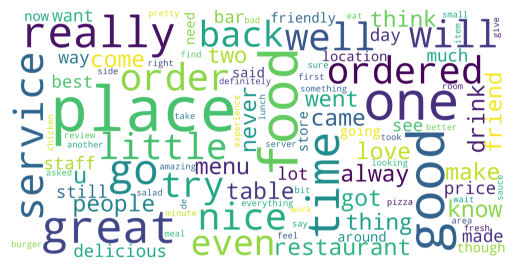

In [5]:
# Importing the required parameter for plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud_text = ''.join(df.text)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Count-based representations
Al pensar en el análisis de palabras, el tema principal de interés es encontrar una representación eficiente y de baja dimensión para facilitar la visualización
de documentos y los análisis a mayor escala.

In [6]:
%pip install scikit-learn

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(AllReviews)
data = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
data.head()

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.9 MB 6.3 MB/s eta 0:00:02
   ----------- ---------------------------- 2.6/8.9 MB 6.9 MB/s eta 0:00:01
   ----------------- ---------------------- 3.9/8.9 MB 6.5 MB/s eta 0:00:01
   ----------------------- ---------------- 5.2/8.9 MB 6.6 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.9 MB 6.6 MB/s eta 0:00:01
   ----------------------------------- ---- 7.9/8.9 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 6.4 MB/s  0:00:01
   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   - -------------------------------------- 1.3/38.7 MB 6.7 MB/s eta 0:00:06
   -- ------------------------------------- 2.4/38.7 MB 5.8 MB/s eta 0:00:07
   --- ------------------------------------ 3.7/38.7 MB 6.2 MB/s eta 0:00:06
   ----- -----------------------

,00,000,0014,00a,00am,00p,00pm,01,0146,0148,...,été,évaluation,éventuellement,évidemment,évite,éviter,évènement,évènements,êtes,être
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Stop words
reason, it is common to pre-process text by removing words that you have a reason to believe are uninformative; these words are called stop words.

In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to C:\Users\Ismenia
[nltk_data]     Guevara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Encontrando las palabras principales
Comenzamos por observar las palabras y los n-gramas que son más comunes en las reseñas positivas y negativas.


place 2975
good 2893
food 2716
just 2337
like 2301
great 2088
time 1974
really 1846
service 1624
ve 1386
don 1219
nice 1202
little 1169
ordered 1147
try 988
came 961
menu 950
pretty 938
love 933
order 928


<Axes: title={'center': 'Top 20 words from all reviews'}, xlabel='ReviewText'>

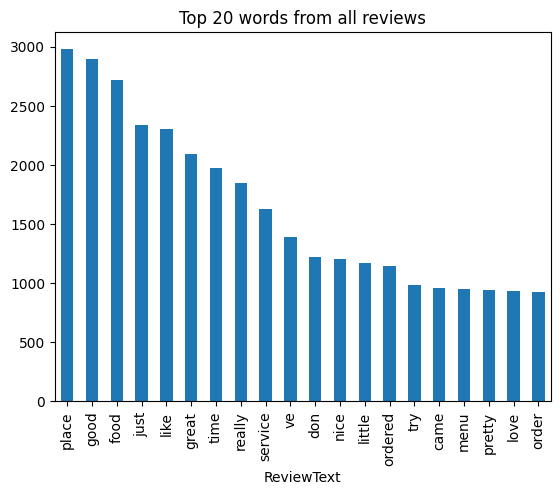

In [9]:
# Following code grabbed from:
# https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

# we will use it in our context to create some visualizations.
def get_top_n_words(allReviews, n=1,k=1):
    vec = CountVectorizer(ngram_range=(k,k),stop_words = 'english').fit(allReviews)
    bag_of_words = vec.transform(allReviews)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# We start by getting a list of the most common words.
common_words = get_top_n_words(AllReviews, 20, 1)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words from all reviews')